## 1. Importing Dependencies

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

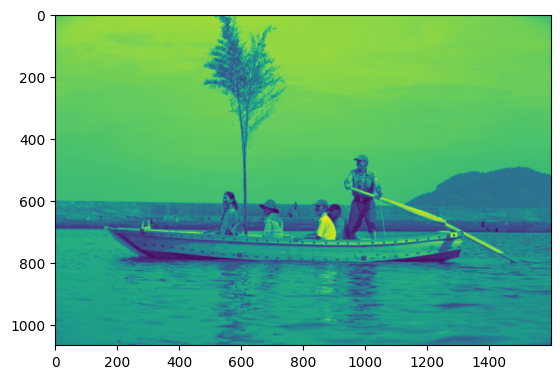

In [68]:
# Reading the image
image = cv2.imread('boat.jpg', 0) # reading in grayscale
image = cv2.GaussianBlur(image, (5, 5), 0) # applying blur

plt.imshow(image);

## 2. Calculating Otsu's Threshold

### NOTES
1. The foreground class is the pixels above the threshold, while the background class is the pixels below the threshold.
2. The optimal threshold value is the one that maximizes the inter-class variance.
3. Mean for both foreground and background classes are computed by multiplying the `hist` values and `bin_mids` vlaue to get the total intensity value of the pixels in each class. This is then divided by the probability of the corresponding class to get the mean value.
4. The inter-class variance is a measure of how well a given threshold separates the foreground and background classes which is calculated by multiplying the probabilities of the two classes on either side of the threshold, the squared difference between the means of the two classes, and summing over all threshold values.


In [67]:
# range of intensity values in the image
bins_num = 256
 
# calculating the image histogram
hist, bin_edges = np.histogram(image, bins=bins_num)

# normalized histogram by dividing with the max hist
hist = np.divide(hist.ravel(), hist.max()) # Get normalized histogram if it is required
 
# average of the lower and upper edges of each bin.
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.
 
# Cumulative probabilities of the pixels up to each threshold value
weight1 = np.cumsum(hist) 
weight2 = np.cumsum(hist[::-1])[::-1] 
 
# Get the class means mu0(t)
mean1 = np.cumsum(hist * bin_mids) / weight1
# Get the class means mu1(t)
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]
 
inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
 
# Maximize the inter_class_variance function val
# function returns the index of the maximum value in the inter_class_variance array, 
# which corresponds to the optimal threshold value
index_of_max_val = np.argmax(inter_class_variance) 
 
threshold = bin_mids[:-1][index_of_max_val]

print("Otsu's thresholding result: ", threshold)

Otsu's thresholding result:  151.818359375


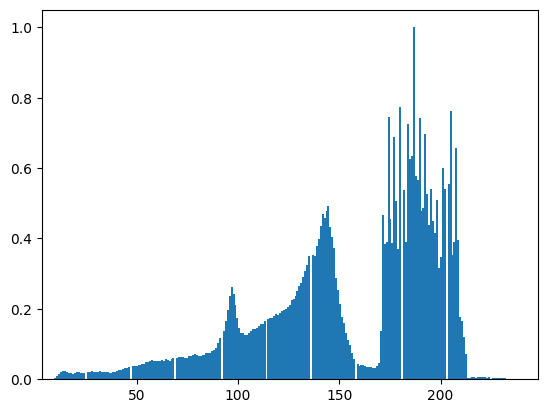

In [60]:
# Plotting the histogram
plt.bar(bin_edges[:-1], hist, width=1)
plt.xlim(min(bin_edges), max(bin_edges));

## OpenCV Threshold Function

In [62]:
# Calculate the threshold value using the Otsu algorithm
threshold_value, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
threshold_value

152.0

In [70]:
# comparing both the threshold values
threshold, threshold_value

(151.818359375, 152.0)

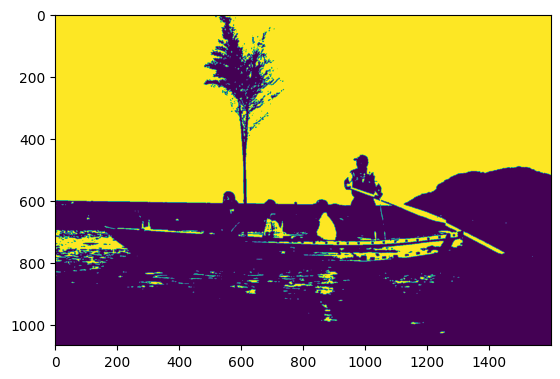

In [63]:
# final binarized image
plt.imshow(binary_image);

In [64]:
# Check the shape of the image
height, width = binary_image.shape
print(f'Image has a height of {height} pixels and a width of {width} pixels')

# Check the pixel values of a single pixel
pixel_value = binary_image[100, 100]
print(f'Pixel value at (100, 100): {pixel_value}')

Image has a height of 1066 pixels and a width of 1600 pixels
Pixel value at (100, 100): 255


## Image separated into 2 clusters with intensities values 0 and 255

Text(0, 0.5, 'Pixel Count')

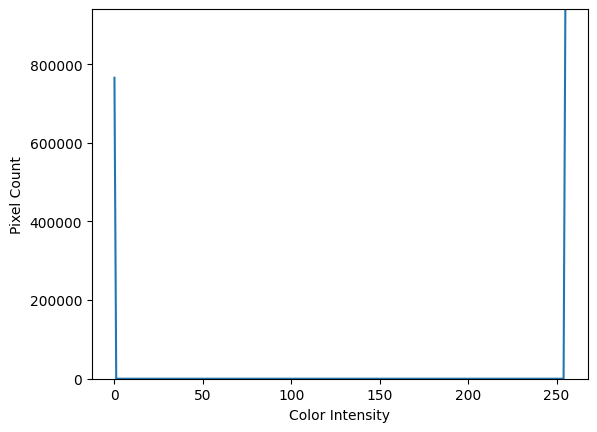

In [65]:
# Get the image histogram
hist, bin_edges = np.histogram(binary_image, bins=256)

# Plot histogram
plt.plot(hist)
# plt.xlim([0, 256])
plt.ylim(0, max(hist))
plt.xlabel('Color Intensity')
plt.ylabel('Pixel Count')

In [66]:
len(hist)

256